In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import yfinance as yf

In [4]:
from datetime import date, timedelta

In [5]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")

In [6]:
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")


In [9]:
# list of stock tickers to download
tickers = ['RELIANCE.NS', 'INFY.NS', 'HDFCBANK.NS']

In [10]:
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

In [11]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()


In [12]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

In [13]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

In [14]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

In [15]:
print(stock_data.head())

Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-07-10  HDFCBANK.NS  1634.135132  1656.449951  1676.750000   
1         2023-07-10      INFY.NS  1304.812012  1329.150024  1341.900024   
2         2023-07-10  RELIANCE.NS  2515.564209  2524.450195  2543.787109   
3         2023-07-11  HDFCBANK.NS  1626.193604  1648.400024  1676.000000   
4         2023-07-11      INFY.NS  1323.905762  1348.599976  1350.900024   

Attribute          Low         Open      Volume  
0          1649.699951  1661.000000  19199221.0  
1          1319.300049  1336.550049   3940315.0  
2          2469.024170  2481.853760  16620008.0  
3          1645.500000  1663.000000  25335213.0  
4          1327.000000  1333.449951   6126128.0  


In [17]:
#Now, let’s have a look at the stock market performance of these companies in the stock market over time:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [19]:
stock_data.set_index('Date', inplace=True)

In [20]:
stock_data.reset_index(inplace=True)

In [22]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [23]:
sns.set(style='whitegrid')

C:\Users\goyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\goyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


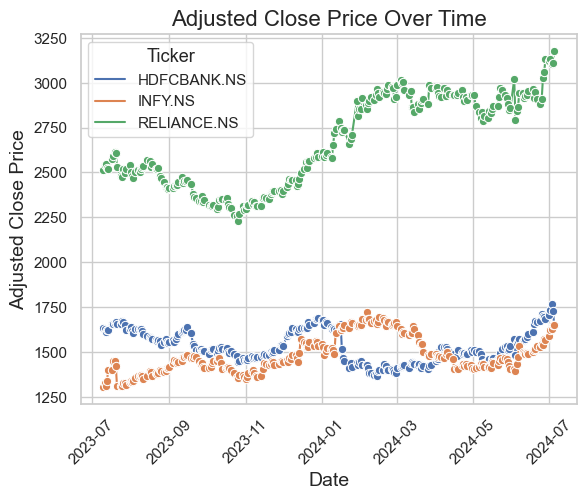

In [34]:
sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()

In [36]:
#The graph displays the adjusted close prices of three stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS,) over time from July 2023 to July 2024. It highlights that RELIANCE has the highest adjusted close prices, followed by INFY (Infosys), and HDFCBANK.
#The prices for RELIANCE show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.
#Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

In [40]:
short_window = 50
long_window = 200

In [41]:
stock_data.set_index('Date', inplace=True)

In [71]:
unique_tickers = stock_data['Ticker'].unique()
print(unique_tickers)


['HDFCBANK.NS' 'INFY.NS' 'RELIANCE.NS']


In [44]:
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

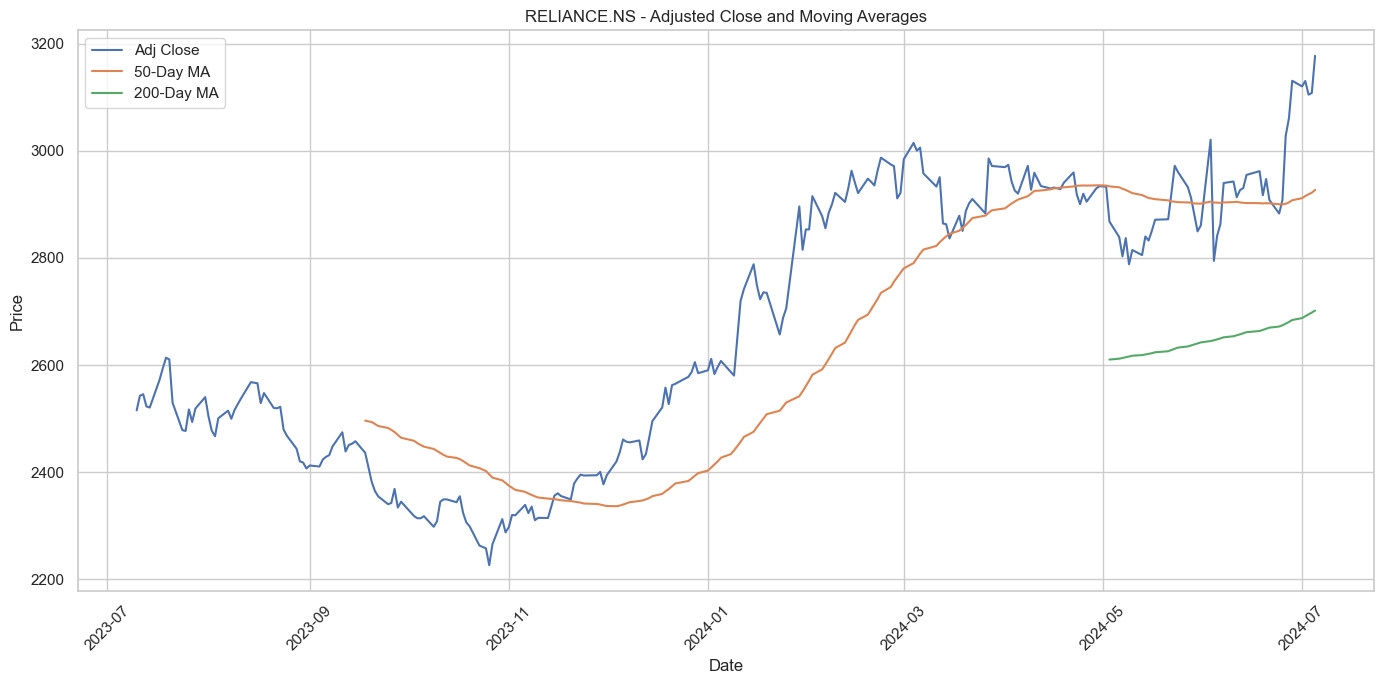

In [79]:
plt.figure(figsize=(14, 7))
plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
plt.title(f'{ticker} - Adjusted Close and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

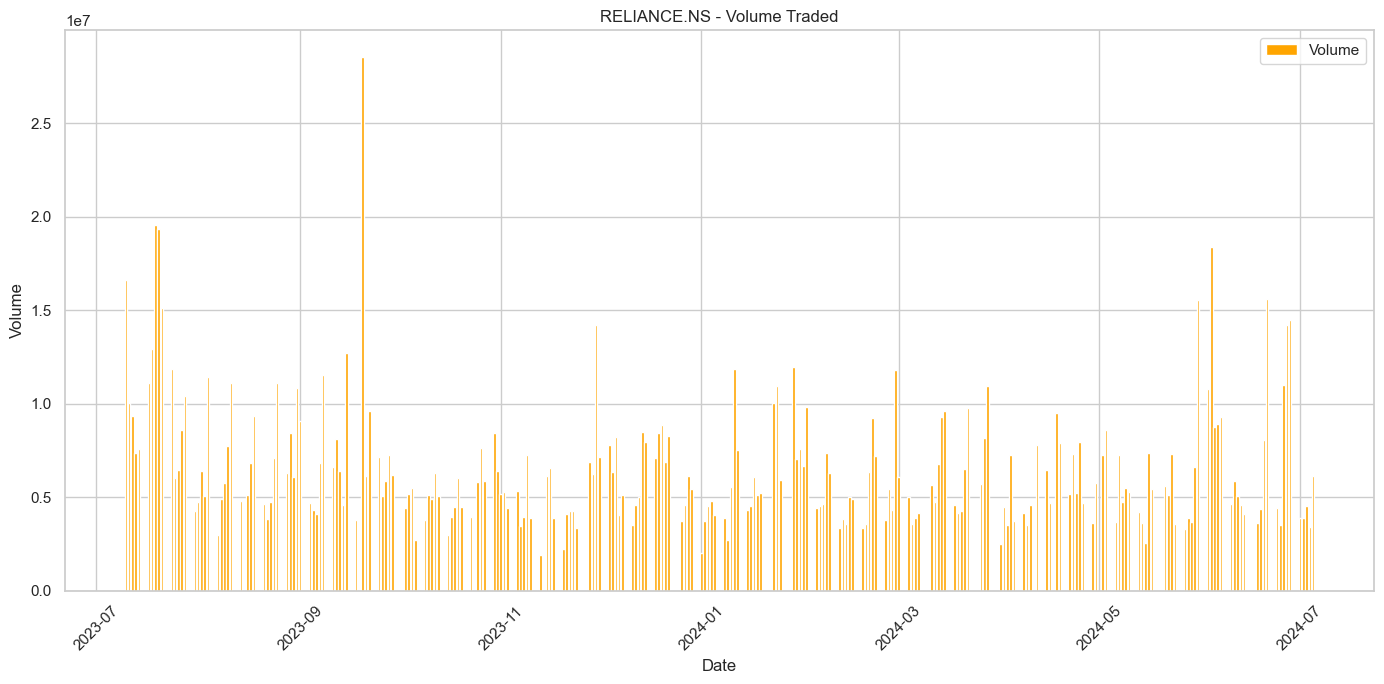

In [76]:
plt.figure(figsize=(14, 7))
plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
plt.title(f'{ticker} - Volume Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()